# 라이브러리 임포트

In [2]:
# 데이터 분석용
import pandas as pd
import numpy as np
# 데이터 시각화용
import matplotlib.pyplot as plt
import seaborn as sns

# 머신러닝 모듈
import sklearn
# 데이터셋 분리하는 함수
from sklearn.model_selection import train_test_split
# 지도학습 -> 분류 모델
from sklearn.tree import DecisionTreeClassifier
# 데이터셋
from sklearn.datasets import load_breast_cancer, make_blobs

# 데이터 로드

make_blobs()
- 파라미터
  - n_samples: 표본 데이터의 수
  - centers: 생성할 클러스터의 수 또는 중심
  - cluster_std: 클러스터의 표준 편차
- 리턴
  - X: (n_samples, n_features) 크기의 배열 독립 변수
  - y: (n_smaples) 크기의 배열 종속 변수

In [3]:
X, _ = make_blobs(
    n_samples= 200, centers= 5, random_state=4, cluster_std=1.5)

In [5]:
# 훈련 세트와 테스트 세트로 나눕니다
X_train, X_test = train_test_split(
    X, random_state=5, test_size=.1)

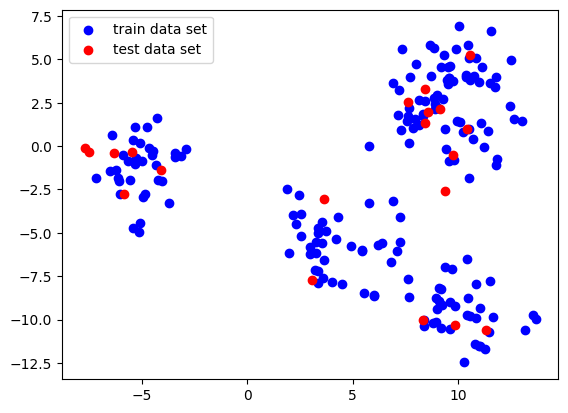

In [6]:
plt.scatter(X_train[:,0],X_train[:,1]
            , c='b', label="train data set")
plt.scatter(X_test[:,0],X_test[:,1]
            , c='r', label="test data set")

plt.legend()
plt.show()

## Normalizer
-  Normalizer 의 경우 각 샘플(행)마다 적용되는 방식입니다.
- 이는 한 행의 모든 특성들 사이의 유클리드 거리(L2 norm)가 1이 되도록 스케일링합니다.
- 일반적인 데이터 전처리의 상황에서 사용되는 것이 아니라
- 모델(특히나 딥러닝) 내 학습 벡터에 적용하며,
- 특히나 피쳐들이 다른 단위(키, 나이, 소득 등)라면 더더욱 사용하지 않습니다.

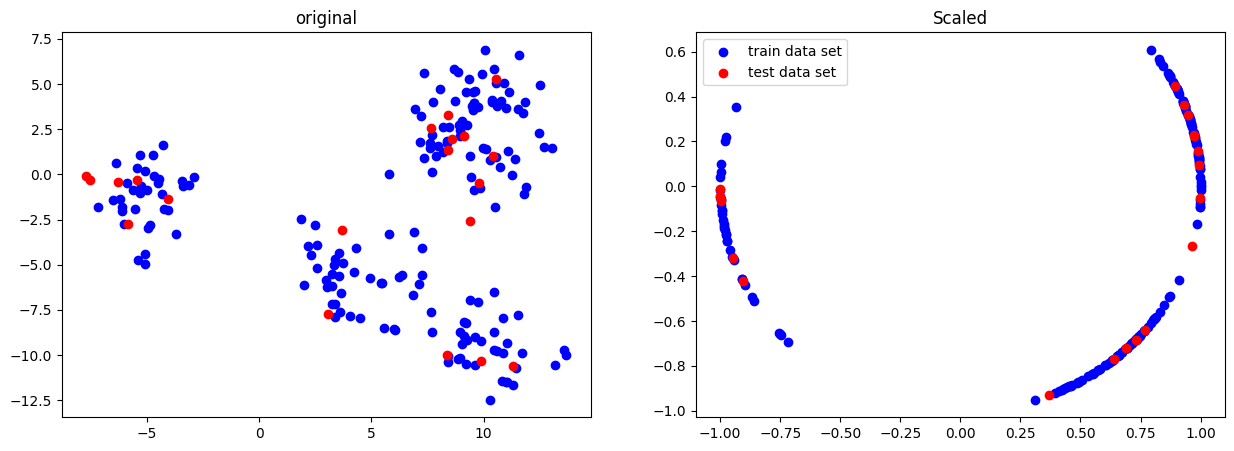

In [7]:
from sklearn.preprocessing import Normalizer

scaler = Normalizer()

X_scaled = scaler.fit_transform(X_train)
#해당 fit으로 test데이터도 transform 해줍니다
X_test_scaled = scaler.transform(X_test)

fig, ax = plt.subplots(1,2,figsize=[15,5])

# 첫번째 로우 & 왼쪽
ax[0].scatter(X_train[:,0],X_train[:,1], c='b', label="train data set")
ax[0].scatter(X_test[:,0],X_test[:,1], c='r', label="test data set")
ax[0].set_title('original')

# 첫번째 로우 & 오른쪽
ax[1].scatter(X_scaled[:,0],X_scaled[:,1], c='b', label="train data set")
ax[1].scatter(X_test_scaled[:,0],X_test_scaled[:,1], c='r', label="test data set")
ax[1].set_title('Scaled')

plt.legend()
plt.show()

# Transformer

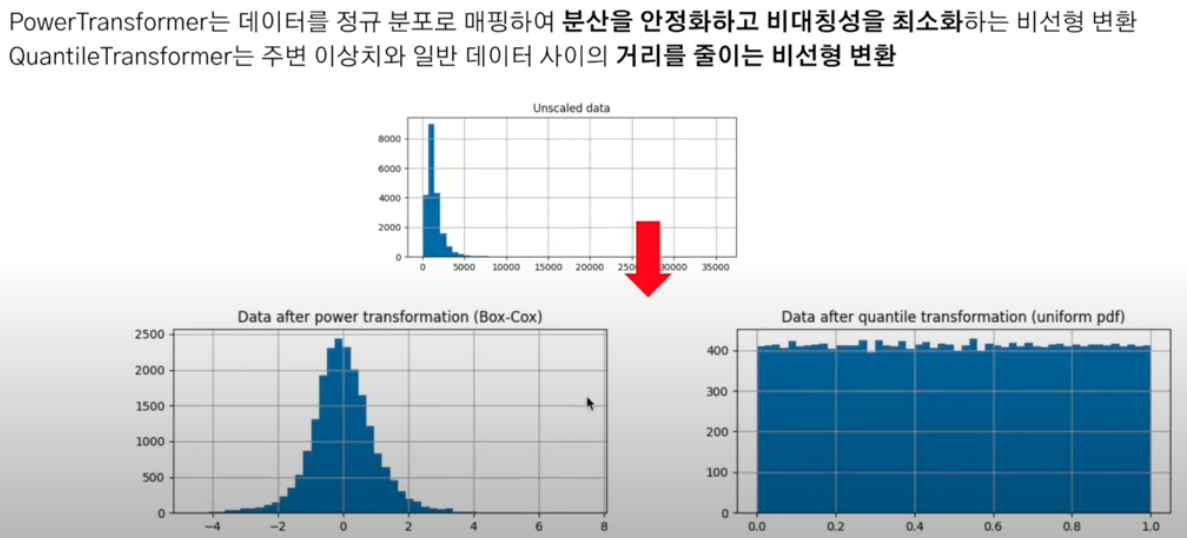

## PowerTransformer
> 데이터의 특성별로 정규분포형태에 가깝도록 변환

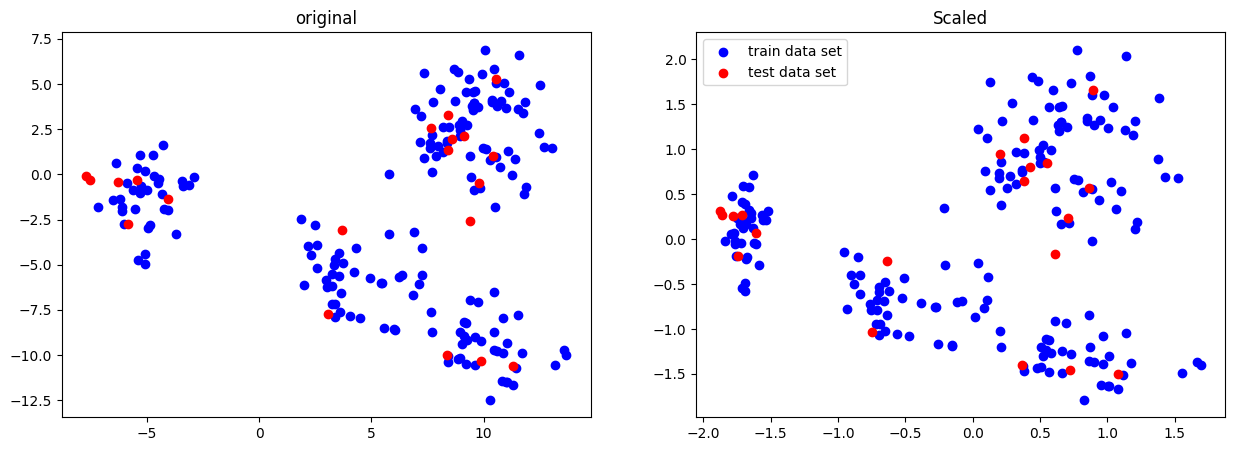

In [8]:
from sklearn.preprocessing import PowerTransformer

scaler = PowerTransformer()

X_scaled = scaler.fit_transform(X_train)
#해당 fit으로 test데이터도 transform 해줍니다
X_test_scaled = scaler.transform(X_test)

fig, ax = plt.subplots(1,2,figsize=[15,5])

# 첫번째 로우 & 왼쪽
ax[0].scatter(X_train[:,0],X_train[:,1], c='b', label="train data set")
ax[0].scatter(X_test[:,0],X_test[:,1], c='r', label="test data set")
ax[0].set_title('original')

# 첫번째 로우 & 오른쪽
ax[1].scatter(X_scaled[:,0],X_scaled[:,1], c='b', label="train data set")
ax[1].scatter(X_test_scaled[:,0],X_test_scaled[:,1], c='r', label="test data set")
ax[1].set_title('Scaled')

plt.legend()
plt.show()

## QuantileTransformer
> 기본적으로 1000개 분위를 사용하여 데이터를 '균등분포' 시킵니다.  
> Robust처럼 이상치에 민감하지 않으며, 데이터를 0 ~ 1 사이로 압축합니다.

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_data.py:2829: UserWarning: n_quantiles (1000) is greater than the total number of samples (180). n_quantiles is set to n_samples.
  warnings.warn(


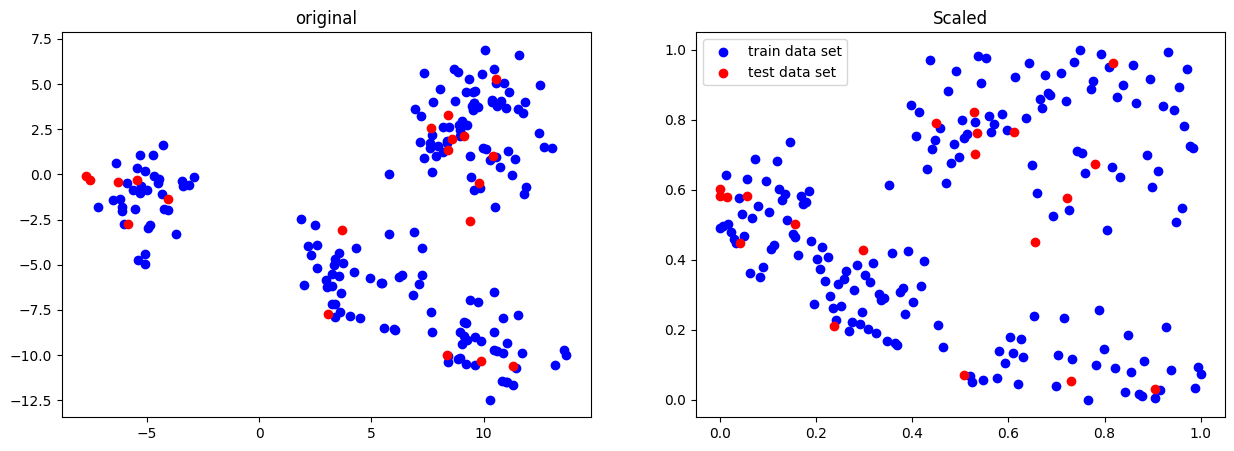

In [9]:
from sklearn.preprocessing import QuantileTransformer

scaler = QuantileTransformer()

X_scaled = scaler.fit_transform(X_train)
#해당 fit으로 test데이터도 transform 해줍니다
X_test_scaled = scaler.transform(X_test)

fig, ax = plt.subplots(1,2,figsize=[15,5])

# 첫번째 로우 & 왼쪽
ax[0].scatter(X_train[:,0],X_train[:,1], c='b', label="train data set")
ax[0].scatter(X_test[:,0],X_test[:,1], c='r', label="test data set")
ax[0].set_title('original')

# 첫번째 로우 & 오른쪽
ax[1].scatter(X_scaled[:,0],X_scaled[:,1], c='b', label="train data set")
ax[1].scatter(X_test_scaled[:,0],X_test_scaled[:,1], c='r', label="test data set")
ax[1].set_title('Scaled')

plt.legend()
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_data.py:2829: UserWarning: n_quantiles (1000) is greater than the total number of samples (180). n_quantiles is set to n_samples.
  warnings.warn(


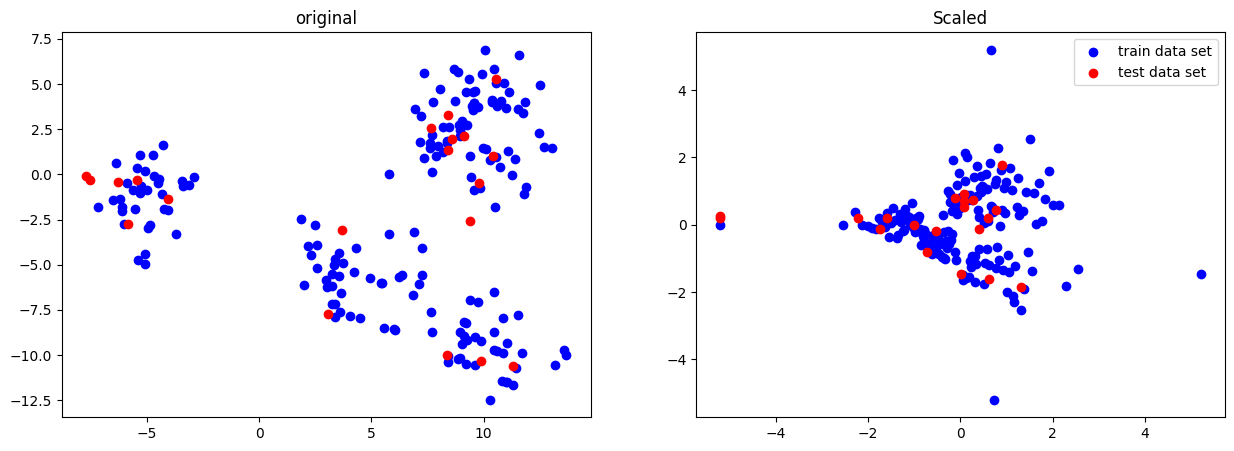

In [10]:
from sklearn.preprocessing import QuantileTransformer

# QuantileTransformer + 정규분포 형태로 변환
scaler = QuantileTransformer(output_distribution = 'normal')

X_scaled = scaler.fit_transform(X_train)
#해당 fit으로 test데이터도 transform 해줍니다
X_test_scaled = scaler.transform(X_test)

fig, ax = plt.subplots(1,2,figsize=[15,5])

# 첫번째 로우 & 왼쪽
ax[0].scatter(X_train[:,0],X_train[:,1], c='b', label="train data set")
ax[0].scatter(X_test[:,0],X_test[:,1], c='r', label="test data set")
ax[0].set_title('original')

# 첫번째 로우 & 오른쪽
ax[1].scatter(X_scaled[:,0],X_scaled[:,1], c='b', label="train data set")
ax[1].scatter(X_test_scaled[:,0],X_test_scaled[:,1], c='r', label="test data set")
ax[1].set_title('Scaled')

plt.legend()
plt.show()

# Scaler
> 데이터가 가진 크기와 편차가 다르기 때문에 한 피처의 특징을 너무 많이 반영하거나 패턴을 찾아내는데 문제가 발생한다.   
> 따라서 데이터 스케일링을 통해 모든 피처들의 데이터 분포나 범위를 동일하게 조정해줄 필요가 있다.

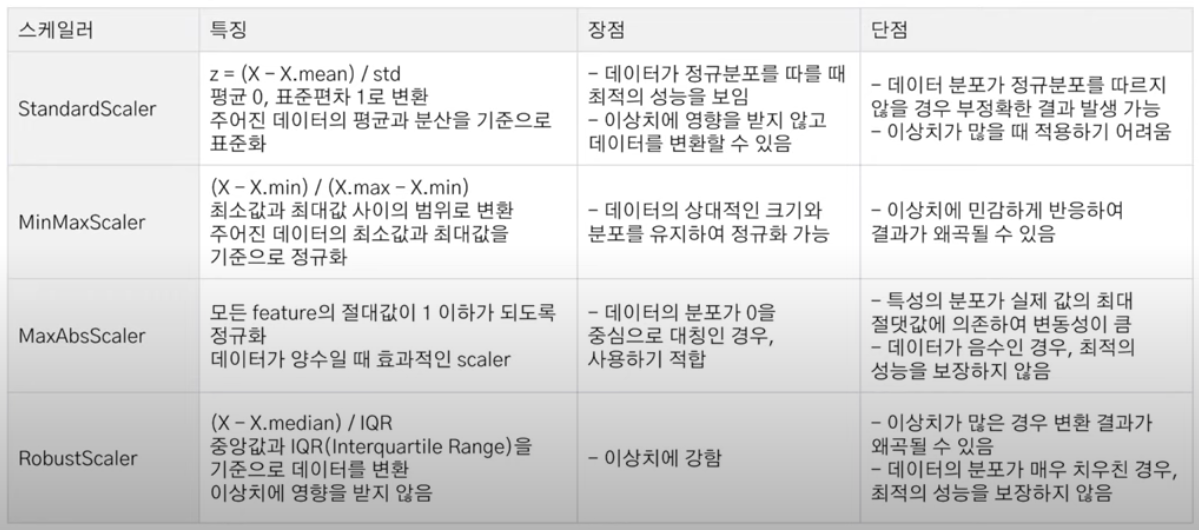

## Standard Scaler
> 평균 0, 분산 1로 조정합니다.

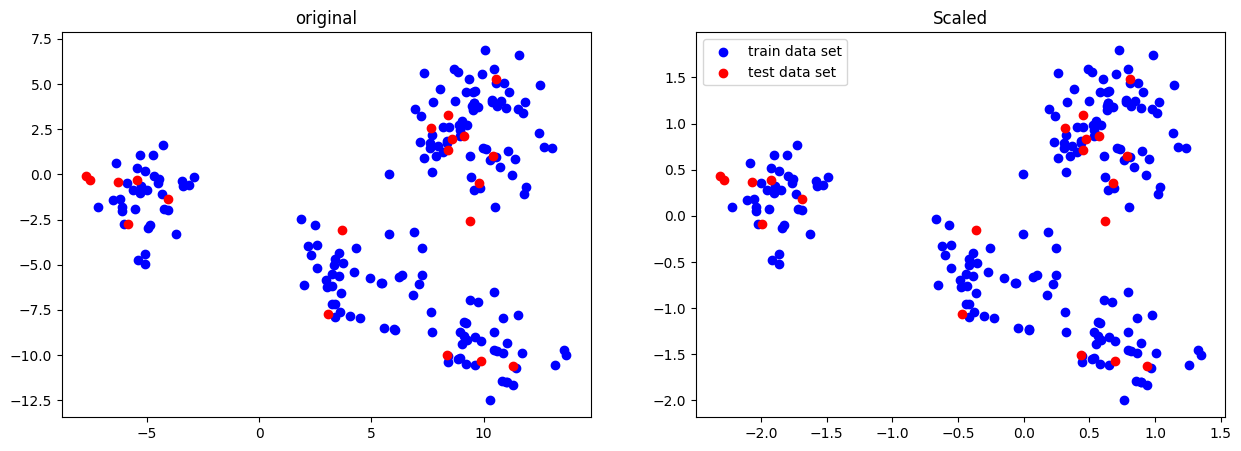

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X_train)
#해당 fit으로 test데이터도 transform 해줍니다
X_test_scaled = scaler.transform(X_test)

fig, ax = plt.subplots(1,2,figsize=[15,5])

# 첫번째 로우 & 왼쪽
ax[0].scatter(X_train[:,0],X_train[:,1], c='b', label="train data set")
ax[0].scatter(X_test[:,0],X_test[:,1], c='r', label="test data set")
ax[0].set_title('original')

# 첫번째 로우 & 오른쪽
ax[1].scatter(X_scaled[:,0],X_scaled[:,1], c='b', label="train data set")
ax[1].scatter(X_test_scaled[:,0],X_test_scaled[:,1], c='r', label="test data set")
ax[1].set_title('Scaled')

plt.legend()
plt.show()

## Robust Scaler
> 평균과 분산 대신 중간값(median)과 사분위값을 사용합니다.  
> 중간값과 사분위값을 사용하여 이상치가 있는 데이터에 매우 효과적입니다.

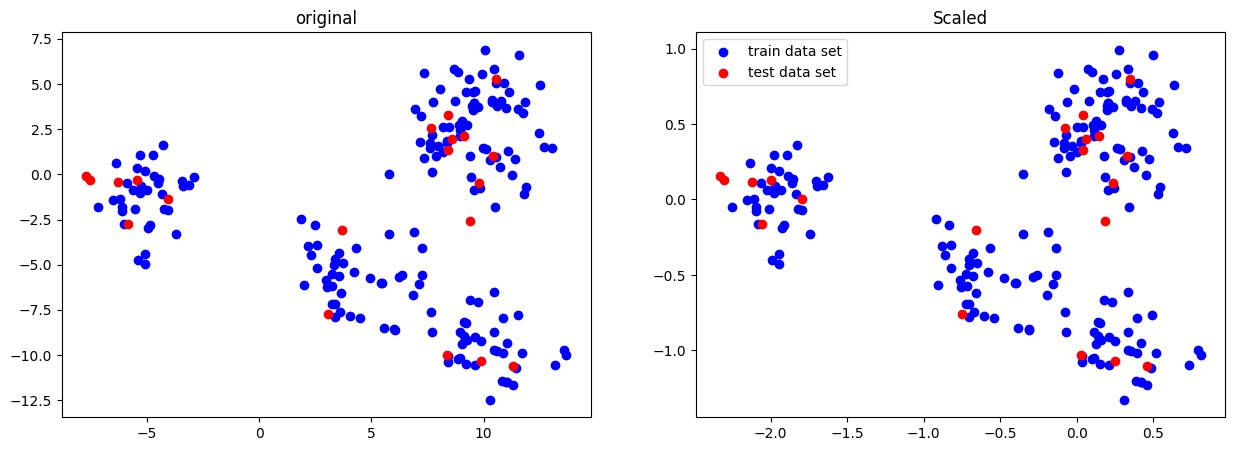

In [12]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X_scaled = scaler.fit_transform(X_train)
#해당 fit으로 test데이터도 transform 해줍니다
X_test_scaled = scaler.transform(X_test)

fig, ax = plt.subplots(1,2,figsize=[15,5])

# 첫번째 로우 & 왼쪽
ax[0].scatter(X_train[:,0],X_train[:,1], c='b', label="train data set")
ax[0].scatter(X_test[:,0],X_test[:,1], c='r', label="test data set")
ax[0].set_title('original')

# 첫번째 로우 & 오른쪽
ax[1].scatter(X_scaled[:,0],X_scaled[:,1], c='b', label="train data set")
ax[1].scatter(X_test_scaled[:,0],X_test_scaled[:,1], c='r', label="test data set")
ax[1].set_title('Scaled')

plt.legend()
plt.show()

## MinMax Scaler
> 모든 피처들을 0 ~ 1 사이의 데이터 값을 갖도록 만들어준다.  
> 이상치에 영향을 많이 받는 방법이다.

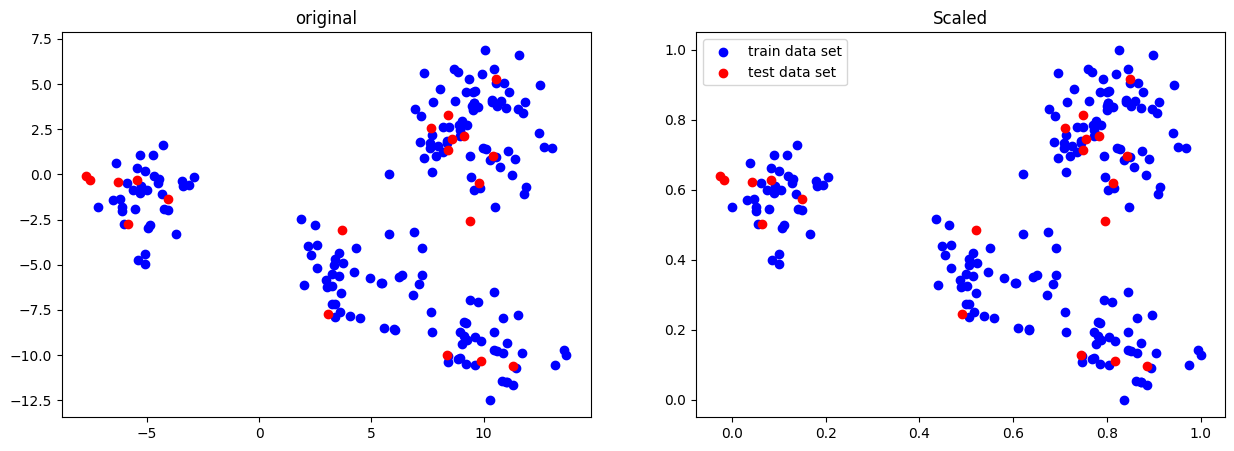

In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_scaled = scaler.fit_transform(X_train)
#해당 fit으로 test데이터도 transform 해줍니다
X_test_scaled = scaler.transform(X_test)

fig, ax = plt.subplots(1,2,figsize=[15,5])

# 첫번째 로우 & 왼쪽
ax[0].scatter(X_train[:,0],X_train[:,1], c='b', label="train data set")
ax[0].scatter(X_test[:,0],X_test[:,1], c='r', label="test data set")
ax[0].set_title('original')

# 첫번째 로우 & 오른쪽
ax[1].scatter(X_scaled[:,0],X_scaled[:,1], c='b', label="train data set")
ax[1].scatter(X_test_scaled[:,0],X_test_scaled[:,1], c='r', label="test data set")
ax[1].set_title('Scaled')

plt.legend()
plt.show()

## MaxAbs Scaler
> 모든 피처들의 절댓값이 0과 1 사이에 놓이도록 만들어준다.  
> 즉, 0을 기준으로 절댓값이 가장 큰 수가 1 또는 -1의 값을 가지게 된다.  
> 이것 역시 이상치에 영향을 많이 받는다.

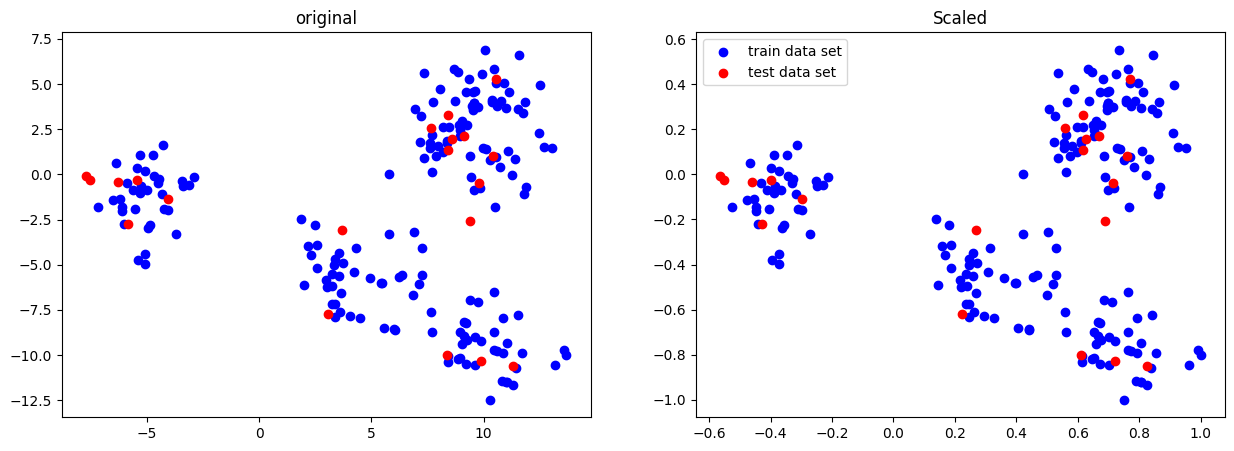

In [14]:
from sklearn.preprocessing import MaxAbsScaler

scaler = MaxAbsScaler()

X_scaled = scaler.fit_transform(X_train)
#해당 fit으로 test데이터도 transform 해줍니다
X_test_scaled = scaler.transform(X_test)

fig, ax = plt.subplots(1,2,figsize=[15,5])

# 첫번째 로우 & 왼쪽
ax[0].scatter(X_train[:,0],X_train[:,1], c='b', label="train data set")
ax[0].scatter(X_test[:,0],X_test[:,1], c='r', label="test data set")
ax[0].set_title('original')

# 첫번째 로우 & 오른쪽
ax[1].scatter(X_scaled[:,0],X_scaled[:,1], c='b', label="train data set")
ax[1].scatter(X_test_scaled[:,0],X_test_scaled[:,1], c='r', label="test data set")
ax[1].set_title('Scaled')

plt.legend()
plt.show()

# Transformer -> Scaler
- SalePrice_ss -> SalePrice_ss_log1p
  - Scaler 적용하고, Transformer를 한 경우
  - 두 그래프의 분포도가 달라지는 것을 알 수 있다.(단점)
- SalePrice_log1p -> SalePrice_log1p_ss
  - Transformer 적용하고, Scaler를 한 경우
  - 두 그래프의 분포도가 동일한 것을 알 수 있다.(장점)

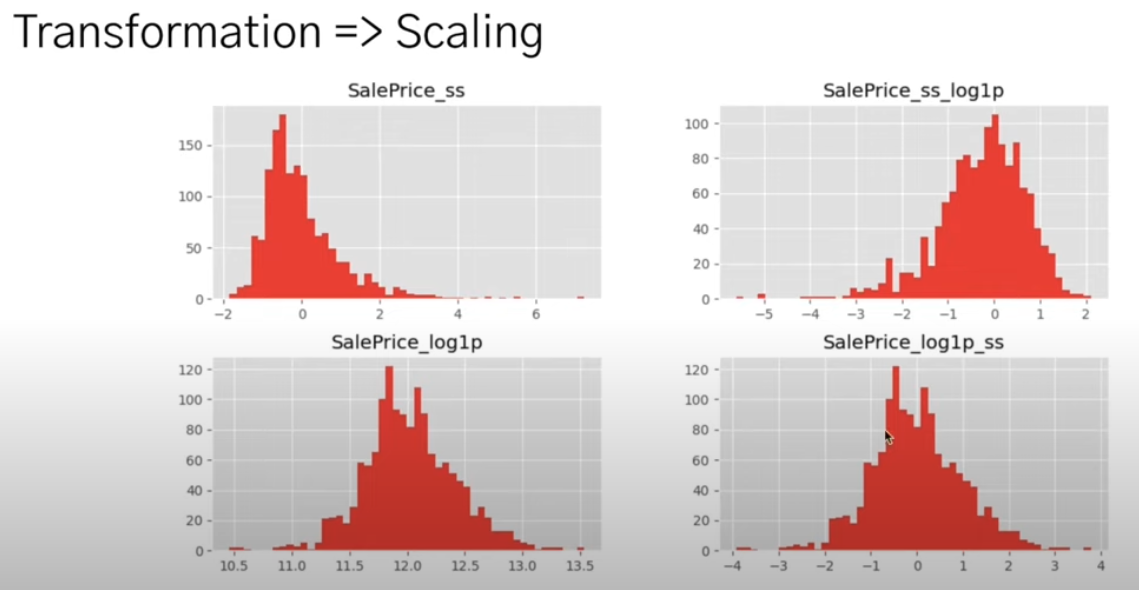

# 예제

## 데이터 로드

In [15]:
from sklearn.datasets import load_breast_cancer

In [16]:
cancer=load_breast_cancer()

dir(cancer)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [17]:
cancer_df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)

cancer_df['target'] = cancer.target
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [18]:
cancer_df.shape

(569, 31)

## 모델 학습

### No Scaler

In [19]:
# 데이터셋 분리
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, test_size=0.2, random_state=3)
# 모델 정의
dtc = DecisionTreeClassifier()
# 모델 학습
dtc.fit(X_train, y_train)
# 모델 평가
no_scaler_score = round(dtc.score(X_test, y_test), 4)
print('모델의 정확도 :', no_scaler_score)

모델의 정확도 : 0.9123


In [20]:
X_train.shape

(455, 30)

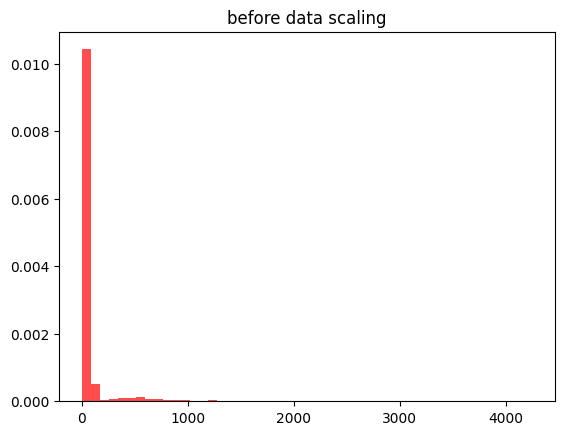

In [21]:
X_train_data = X_train.reshape(13650,1)

plt.hist(X_train_data, bins=50, color= 'red', alpha = 0.7, density = True)
plt.title('before data scaling')
plt.show()

### Normalizer()

In [22]:
from sklearn.preprocessing import Normalizer
# 스케일링
nor_scaler = Normalizer()
nor_scaler.fit(X_train)
X_train_scaled = nor_scaler.transform(X_train)
X_test_scaled = nor_scaler.transform(X_test)

# 모델 학습
dtc = DecisionTreeClassifier()
dtc.fit(X_train_scaled, y_train)

print(f'Normalizer 정확도: {round(dtc.score(X_test_scaled, y_test), 4)} / No Scaler 정확도: {no_scaler_score}')

Normalizer 정확도: 0.9386 / No Scaler 정확도: 0.9123


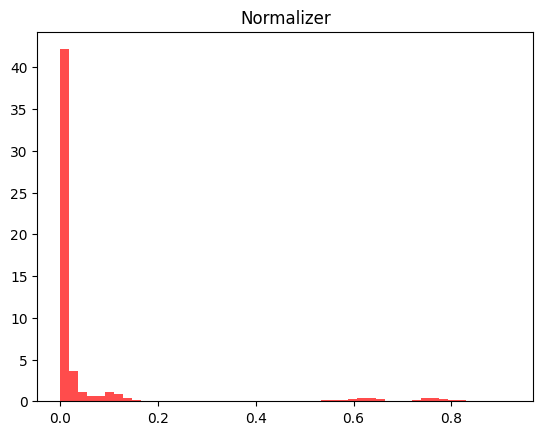

In [23]:
X_train_scaled_ss = X_train_scaled.reshape(13650,1)

plt.hist(X_train_scaled_ss, bins=50, color= 'red', alpha = 0.7, density = True)
plt.title('Normalizer')
plt.show()

### PowerTransformer()

In [24]:
from sklearn.preprocessing import PowerTransformer
# 스케일링
ptf = PowerTransformer()
ptf.fit(X_train)
X_train_scaled = ptf.transform(X_train)
X_test_scaled = ptf.transform(X_test)

# 모델 학습
dtc = DecisionTreeClassifier()
dtc.fit(X_train_scaled, y_train)

print(f'PowerTransformer 정확도: {round(dtc.score(X_test_scaled, y_test), 4)} / No Scaler 정확도: {no_scaler_score}')

PowerTransformer 정확도: 0.8947 / No Scaler 정확도: 0.9123


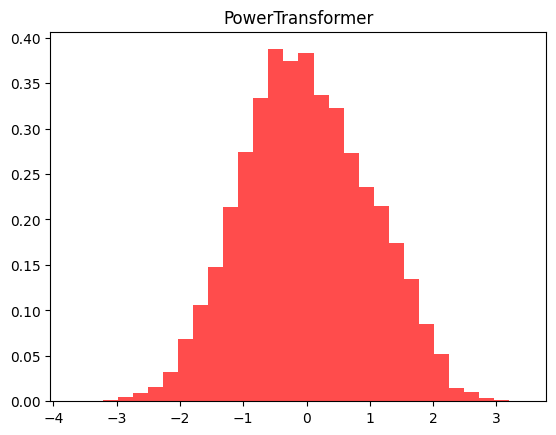

In [25]:
X_train_scaled_ss = X_train_scaled.reshape(13650,1)

plt.hist(X_train_scaled_ss, bins=30, color= 'red', alpha = 0.7, density = True)
plt.title('PowerTransformer')
plt.show()

### QuantileTransformer()

In [26]:
from sklearn.preprocessing import QuantileTransformer


qtf = QuantileTransformer()
qtf.fit(X_train)



X_train_scaled = qtf.transform(X_train)
X_test_scaled = qtf.transform(X_test)


dtc = DecisionTreeClassifier()
dtc.fit(X_train_scaled, y_train)



print(f'QuantileTransformer 정확도: {round(dtc.score(X_test_scaled, y_test), 4)} / No Scaler 정확도: {no_scaler_score}')

QuantileTransformer 정확도: 0.9123 / No Scaler 정확도: 0.9123


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_data.py:2829: UserWarning: n_quantiles (1000) is greater than the total number of samples (455). n_quantiles is set to n_samples.
  warnings.warn(


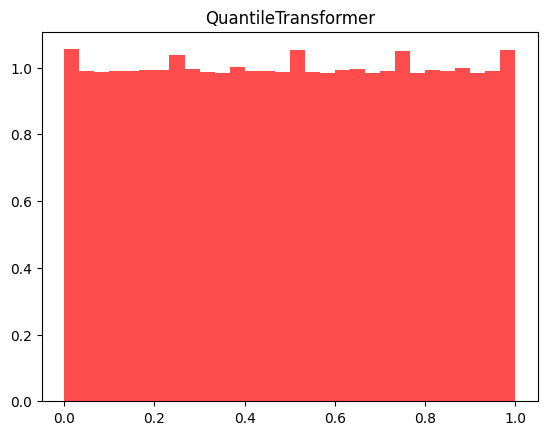

In [27]:
X_train_scaled_ss = X_train_scaled.reshape(13650,1)

plt.hist(X_train_scaled_ss, bins=30, color= 'red', alpha = 0.7, density = True)
plt.title('QuantileTransformer')
plt.show()

In [28]:
qtf = QuantileTransformer(output_distribution = 'normal')
qtf.fit(X_train)
X_train_scaled = qtf.transform(X_train)
X_test_scaled = qtf.transform(X_test)

dtc = DecisionTreeClassifier()
dtc.fit(X_train_scaled, y_train)

print(f'QuantileTransformer with normal 정확도: {round(dtc.score(X_test_scaled, y_test), 4)} / No Scaler 정확도: {no_scaler_score}')

QuantileTransformer with normal 정확도: 0.886 / No Scaler 정확도: 0.9123


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_data.py:2829: UserWarning: n_quantiles (1000) is greater than the total number of samples (455). n_quantiles is set to n_samples.
  warnings.warn(


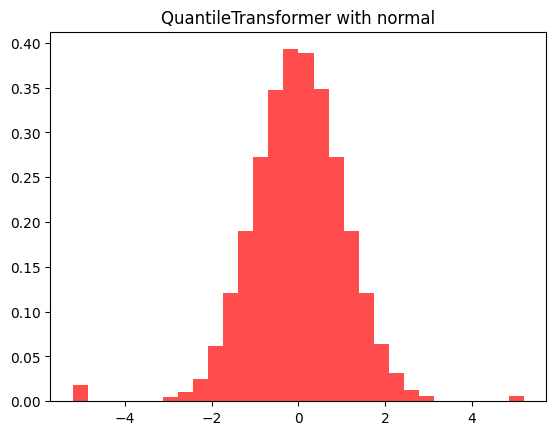

In [29]:
X_train_scaled_ss = X_train_scaled.reshape(13650,1)

plt.hist(X_train_scaled_ss, bins=30, color= 'red', alpha = 0.7, density = True)
plt.title('QuantileTransformer with normal')
plt.show()

### StandardScaler()

In [30]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
std.fit(X_train)
X_train_scaled = std.transform(X_train)
X_test_scaled = std.transform(X_test)

dtc = DecisionTreeClassifier()
dtc.fit(X_train_scaled, y_train)

print(f'StandardScaler 정확도: {round(dtc.score(X_test_scaled, y_test), 4)} / No Scaler 정확도: {no_scaler_score}')

StandardScaler 정확도: 0.9123 / No Scaler 정확도: 0.9123


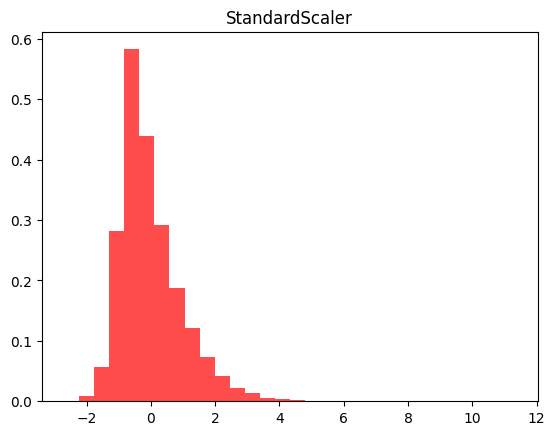

In [31]:
X_train_scaled_ss = X_train_scaled.reshape(13650,1)

plt.hist(X_train_scaled_ss, bins=30, color= 'red', alpha = 0.7, density = True)
plt.title('StandardScaler')
plt.show()

### MinMaxScaler()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
mms.fit(X_train)
X_train_scaled = mms.transform(X_train)
X_test_scaled = mms.transform(X_test)

dtc = DecisionTreeClassifier()
dtc.fit(X_train_scaled, y_train)

print(f'MinMaxScaler 정확도: {round(dtc.score(X_test_scaled, y_test), 4)} / No Scaler 정확도: {no_scaler_score}')

MinMaxScaler 정확도: 0.9035 / No Scaler 정확도: 0.9123


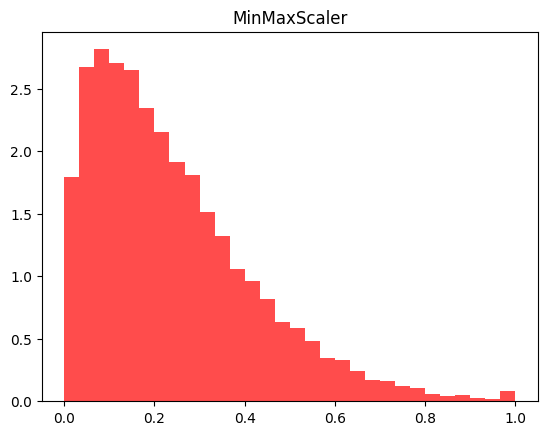

In [ ]:
X_train_scaled_ss = X_train_scaled.reshape(13650,1)

plt.hist(X_train_scaled_ss, bins=30, color= 'red', alpha = 0.7, density = True)
plt.title('MinMaxScaler')
plt.show()

### RobustScaler()

In [ ]:
from sklearn.preprocessing import RobustScaler

rbs = RobustScaler()
X_train_scaled = rbs.fit_transform(X_train)
X_test_scaled = rbs.transform(X_test)

dtc = DecisionTreeClassifier()
dtc.fit(X_train_scaled, y_train)

print(f'RobustScaler 정확도: {round(dtc.score(X_test_scaled, y_test), 4)} / No Scaler 정확도: {no_scaler_score}')

RobustScaler 정확도: 0.9035 / No Scaler 정확도: 0.9123


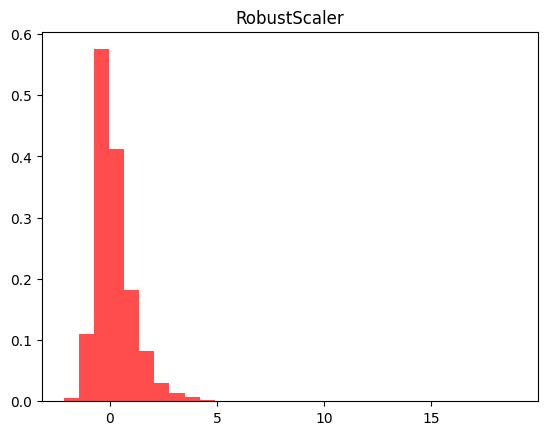

In [ ]:
X_train_scaled_ss = X_train_scaled.reshape(13650,1)

plt.hist(X_train_scaled_ss, bins=30, color= 'red', alpha = 0.7, density = True)
plt.title('RobustScaler')
plt.show()

### MaxAbsScaler()

In [ ]:
from sklearn.preprocessing import MaxAbsScaler

mas = MaxAbsScaler()
mas.fit(X_train)
X_train_scaled = mas.transform(X_train)
X_test_scaled = mas.transform(X_test)

dtc = DecisionTreeClassifier()
dtc.fit(X_train_scaled, y_train)

print(f'RobustScaler 정확도: {round(dtc.score(X_test_scaled, y_test), 4)} / No Scaler 정확도: {no_scaler_score}')

RobustScaler 정확도: 0.8772 / No Scaler 정확도: 0.9123


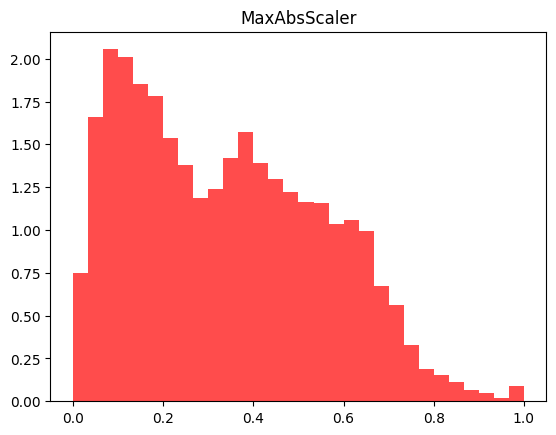

In [ ]:
X_train_scaled_ss = X_train_scaled.reshape(13650,1)

plt.hist(X_train_scaled_ss, bins=30, color= 'red', alpha = 0.7, density = True)
plt.title('MaxAbsScaler')
plt.show()